# Salary Prediction

In [221]:
#Imported all necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [222]:
#Read the csv file
salary_pre_data = pd.read_csv('salary.csv')
salary_pre_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [223]:
salary_pre_data[salary_pre_data.duplicated()].shape

(24, 15)

# Data Cleaning

In [224]:
salary_pre_data.drop_duplicates(keep = 'first',inplace=True)

In [225]:
salary_pre_data[salary_pre_data.duplicated()].shape

(0, 15)

#### First study the Dataset then decide/select which feature are useful to train our model or not.Take those feature to train model and drop necessary feature. .

In [226]:
salary_pre_data.drop(['fnlwgt','education-num','capital-gain','capital-loss','race','relationship'],inplace=True,axis=1)
salary_pre_data.head()

,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Female,40,Cuba,<=50K


In [227]:
salary_pre_data.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation', 'sex',
       'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [228]:
salary_pre_data.rename({'age':'Age', 'workclass':'Employee_Type','education':'Education','marital-status':'Marital_Status', 'occupation':'Occupation', 'sex':'Gender', 'hours-per-week':'Hours_Per_Week', 'native-country':'Native_Country','salary':'Salary'},inplace=True,axis=1)
salary_pre_data.head()

,Age,Employee_Type,Education,Marital_Status,Occupation,Gender,Hours_Per_Week,Native_Country,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Female,40,Cuba,<=50K


In [229]:
salary_pre_data.shape

(32537, 9)

In [230]:
salary_pre_data['Employee_Type'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Employee_Type, dtype: int64

In [231]:
#here we replace the string by unkonwn string
salary_pre_data['Employee_Type'] = salary_pre_data['Employee_Type'].str.replace('?','Private')

In [232]:
salary_pre_data['Employee_Type'].value_counts()

 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Employee_Type, dtype: int64

In [233]:
salary_pre_data['Education'].value_counts()

 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64

In [234]:
salary_pre_data['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [235]:
#here we make group of education
salary_pre_data['Education'].replace([' 11th',' 9th', ' Some-college','7th-8th', ' 5th-6th', ' 10th', ' 1st-4th',' Preschool', ' 12th'],'School Education',inplace=True,regex=True)

In [236]:
#here we make group of education
salary_pre_data['Education'].replace([' Assoc-acdm', ' Assoc-voc',' Prof-school',' Some-college'],'Higher Education',inplace=True,regex=True)

In [237]:
salary_pre_data['Education'].unique()

array([' Bachelors', ' HS-grad', 'School Education', ' Masters',
       'Higher Education', ' School Education', ' Doctorate'],
      dtype=object)

In [238]:
salary_pre_data['Marital_Status'].value_counts()

 Married-civ-spouse       14970
 Never-married            10667
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_Status, dtype: int64

In [239]:
#here we make group of married employee
salary_pre_data['Marital_Status'].replace(['Married-civ-spouse','Married-AF-spouse'],'Married',inplace=True,regex=True)

In [240]:
#here we make group of single or unmarried employee
salary_pre_data['Marital_Status'].replace(['Never-married','Divorced','Separated','Widowed','Married-spouse-absent'],'other',inplace=True,regex=True)

In [241]:
salary_pre_data['Marital_Status'].value_counts()

 other      17544
 Married    14993
Name: Marital_Status, dtype: int64

In [242]:
salary_pre_data['Occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

In [243]:
#here we replace the string by unkonwn string
salary_pre_data['Occupation'] = salary_pre_data['Occupation'].str.replace('?','Prof-specialty')

In [244]:
salary_pre_data['Occupation'].value_counts()

 Prof-specialty       5979
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

In [245]:
salary_pre_data['Gender'].value_counts()

 Male      21775
 Female    10762
Name: Gender, dtype: int64

In [246]:
salary_pre_data['Hours_Per_Week'].value_counts()

40    15204
50     2817
45     1823
60     1475
35     1296
      ...  
82        1
92        1
87        1
74        1
94        1
Name: Hours_Per_Week, Length: 94, dtype: int64

In [247]:
salary_pre_data['Native_Country'].value_counts()

 United-States                 29153
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [248]:
#here we replace the string by unkonwn string
salary_pre_data['Native_Country'] = salary_pre_data['Native_Country'].str.replace('?','United-States')

In [249]:
salary_pre_data['Native_Country'].value_counts()

 United-States                 29735
 Mexico                          639
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [250]:
salary_pre_data['Salary'].value_counts()

 <=50K    24698
 >50K      7839
Name: Salary, dtype: int64

In [251]:
salary_pre_data.head()

,Age,Employee_Type,Education,Marital_Status,Occupation,Gender,Hours_Per_Week,Native_Country,Salary
0,39,State-gov,Bachelors,other,Adm-clerical,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married,Exec-managerial,Male,13,United-States,<=50K
2,38,Private,HS-grad,other,Handlers-cleaners,Male,40,United-States,<=50K
3,53,Private,School Education,Married,Handlers-cleaners,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married,Prof-specialty,Female,40,Cuba,<=50K


In [252]:
salary_pre_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32537 non-null  int64 
 1   Employee_Type   32537 non-null  object
 2   Education       32537 non-null  object
 3   Marital_Status  32537 non-null  object
 4   Occupation      32537 non-null  object
 5   Gender          32537 non-null  object
 6   Hours_Per_Week  32537 non-null  int64 
 7   Native_Country  32537 non-null  object
 8   Salary          32537 non-null  object
dtypes: int64(2), object(7)
memory usage: 2.5+ MB


In [253]:
salary_pre_data.isnull().sum()

Age               0
Employee_Type     0
Education         0
Marital_Status    0
Occupation        0
Gender            0
Hours_Per_Week    0
Native_Country    0
Salary            0
dtype: int64

In [254]:
salary_pre_data.nunique()

Age               73
Employee_Type      8
Education          7
Marital_Status     2
Occupation        14
Gender             2
Hours_Per_Week    94
Native_Country    41
Salary             2
dtype: int64

# Exploratory Data Analysis

In [255]:
salary_pre_data['Age'].value_counts()

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

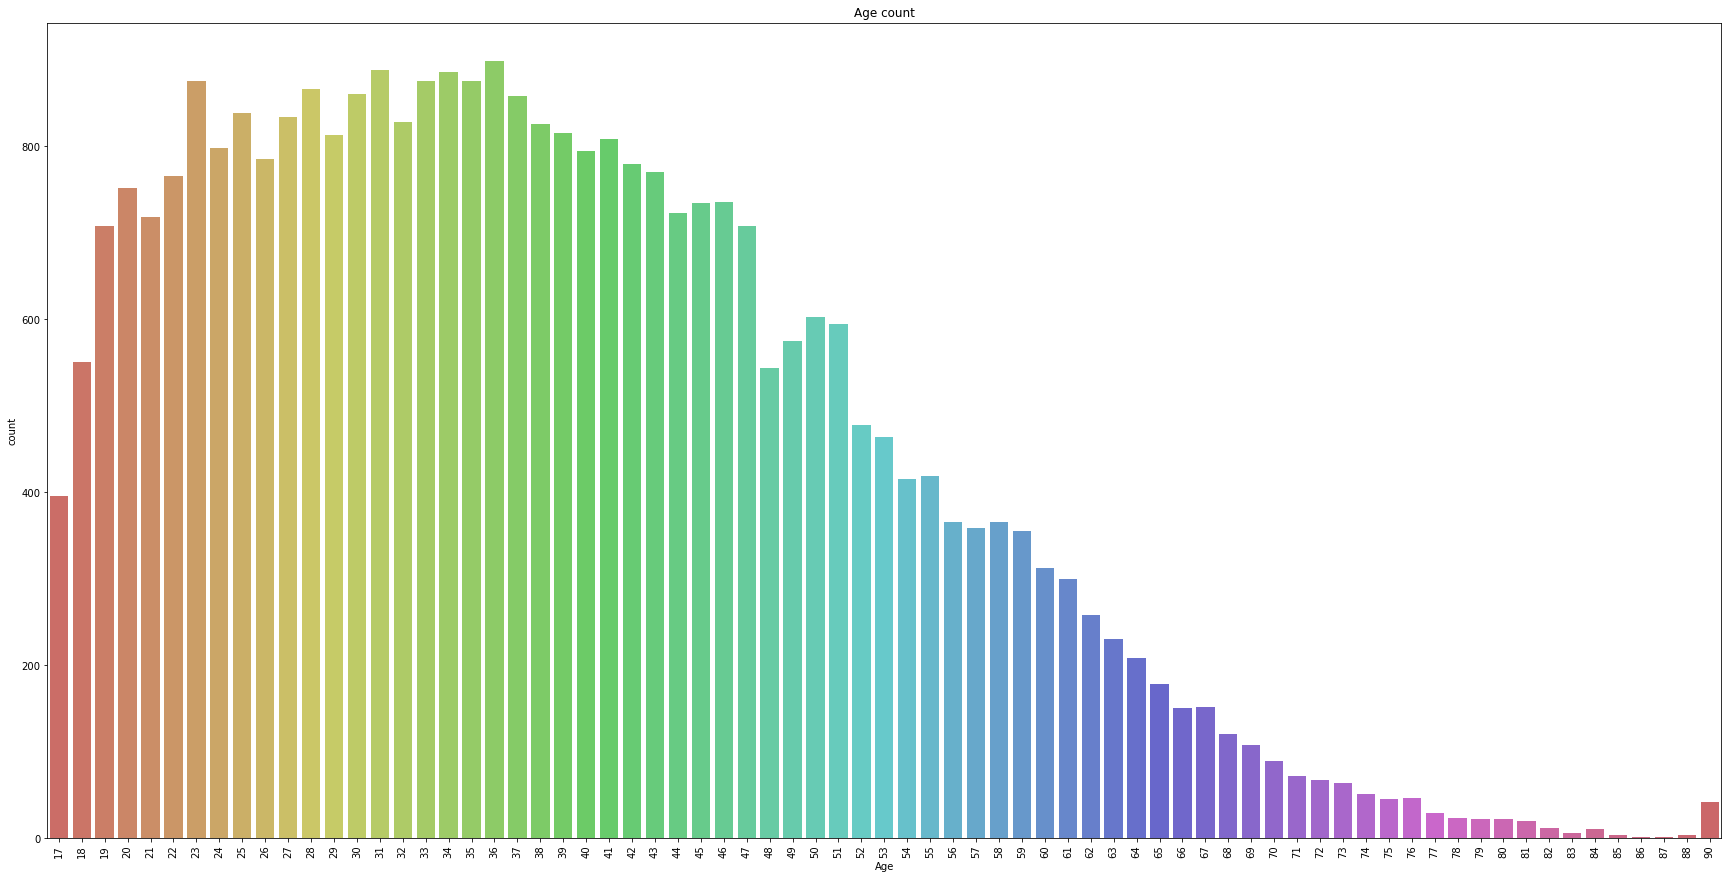

In [256]:
plt.figure(figsize=(30,15))
sns.countplot(salary_pre_data['Age'],data=salary_pre_data,palette='hls')
plt.xticks(rotation = 90)
plt.title('Age count')
plt.show()

In [257]:
salary_pre_data['Employee_Type'].value_counts()

 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Employee_Type, dtype: int64

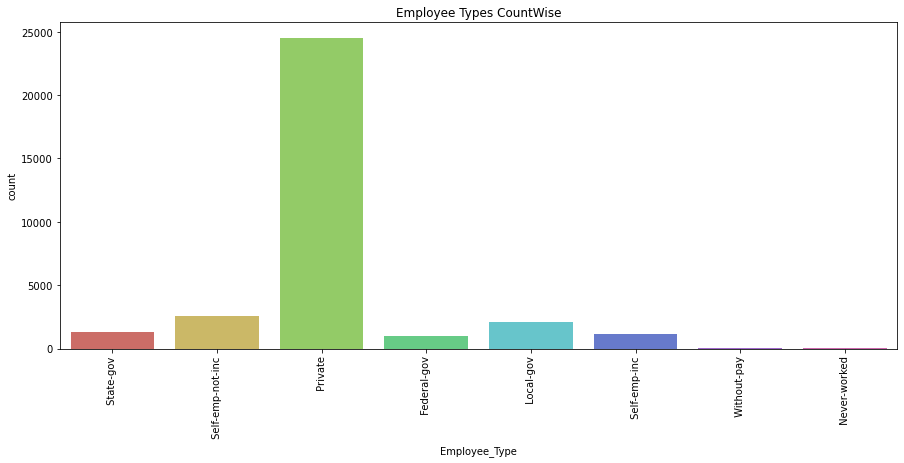

In [258]:
plt.figure(figsize=(15,6))
sns.countplot(salary_pre_data['Employee_Type'],data=salary_pre_data,palette='hls')
plt.xticks(rotation = 90)
plt.title('Employee Types CountWise')
plt.show()

In [259]:
salary_pre_data['Education'].value_counts()

School Education     10885
 HS-grad             10494
 Bachelors            5353
Higher Education      3025
 Masters              1722
 School Education      645
 Doctorate             413
Name: Education, dtype: int64

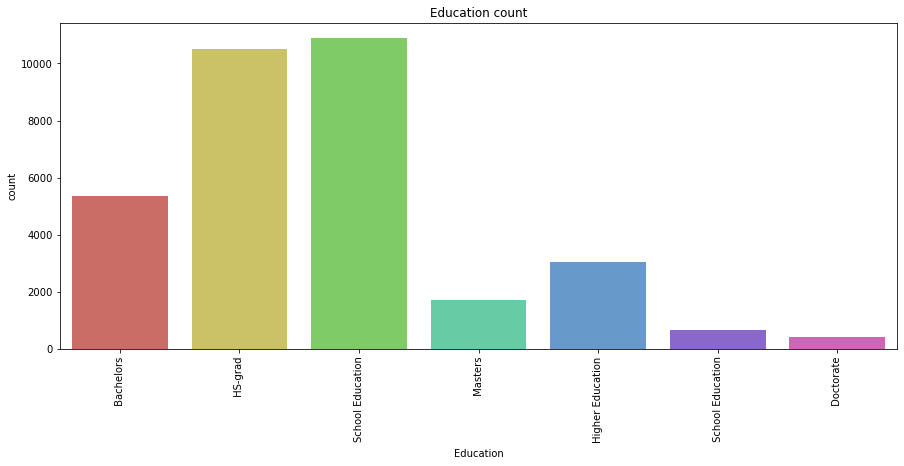

In [260]:
plt.figure(figsize=(15,6))
sns.countplot(salary_pre_data['Education'],data=salary_pre_data,palette='hls')
plt.xticks(rotation = 90)
plt.title('Education count')
plt.show()

In [261]:
salary_pre_data['Marital_Status'].value_counts()

 other      17544
 Married    14993
Name: Marital_Status, dtype: int64

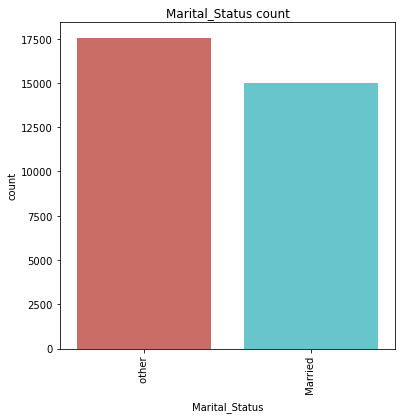

In [262]:
plt.figure(figsize=(6,6))
sns.countplot(salary_pre_data['Marital_Status'],data=salary_pre_data,palette='hls')
plt.xticks(rotation = 90)
plt.title('Marital_Status count')
plt.show()

In [263]:
salary_pre_data['Occupation'].value_counts()

 Prof-specialty       5979
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

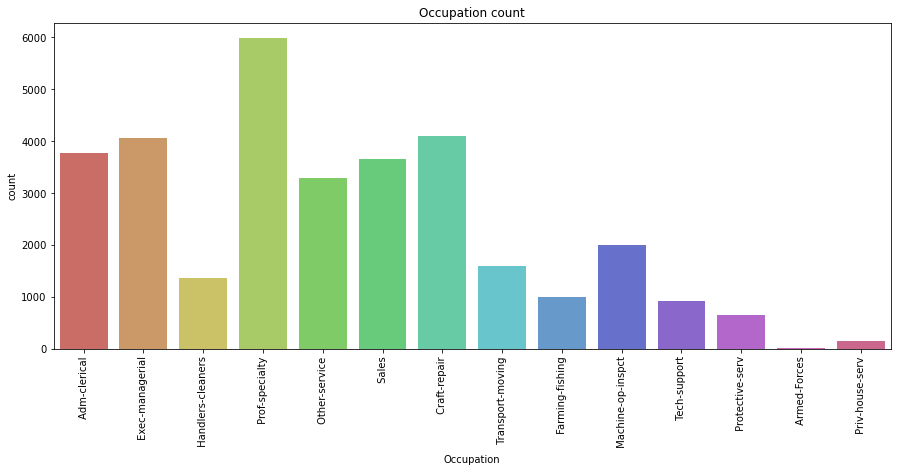

In [264]:
plt.figure(figsize=(15,6))
sns.countplot(salary_pre_data['Occupation'],data=salary_pre_data,palette='hls')
plt.xticks(rotation = 90)
plt.title('Occupation count')
plt.show()

In [265]:
salary_pre_data['Hours_Per_Week'].value_counts()

40    15204
50     2817
45     1823
60     1475
35     1296
      ...  
82        1
92        1
87        1
74        1
94        1
Name: Hours_Per_Week, Length: 94, dtype: int64

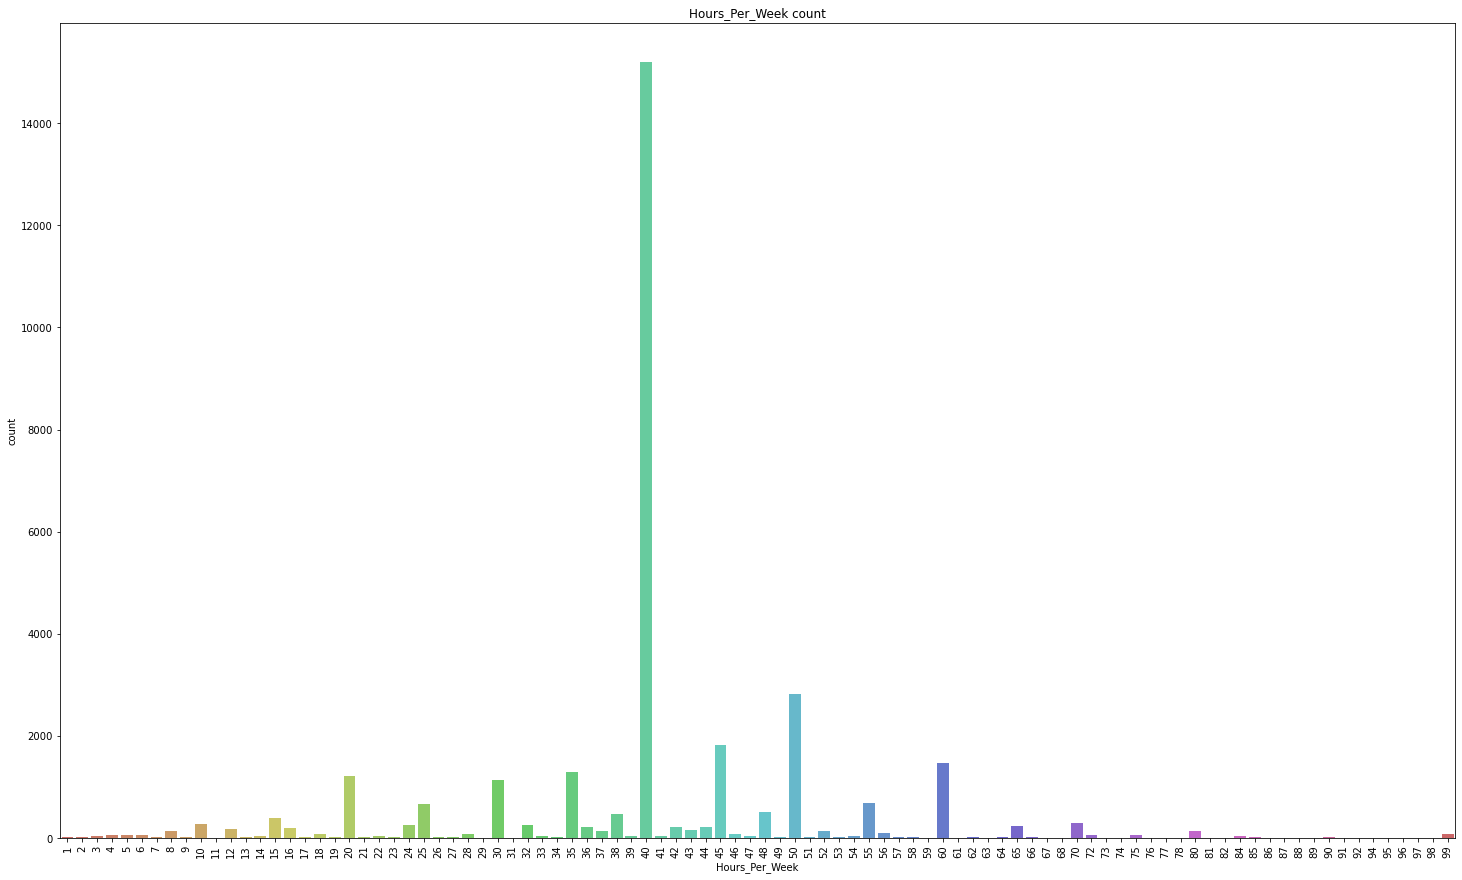

In [266]:
plt.figure(figsize=(25,15))
sns.countplot(salary_pre_data['Hours_Per_Week'],data=salary_pre_data,palette='hls')
plt.xticks(rotation = 90)
plt.title('Hours_Per_Week count')
plt.show()

In [267]:
salary_pre_data['Gender'].value_counts()

 Male      21775
 Female    10762
Name: Gender, dtype: int64

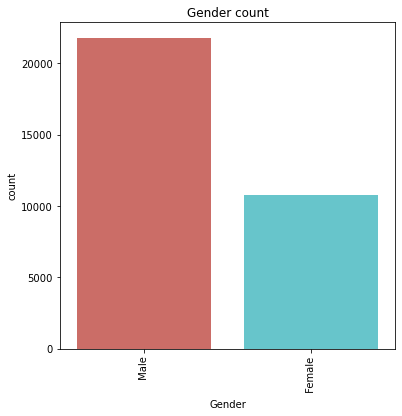

In [268]:
plt.figure(figsize=(6,6))
sns.countplot(salary_pre_data['Gender'],data=salary_pre_data,palette='hls')
plt.xticks(rotation = 90)
plt.title('Gender count')
plt.show()

In [269]:
salary_pre_data['Native_Country'].value_counts()

 United-States                 29735
 Mexico                          639
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

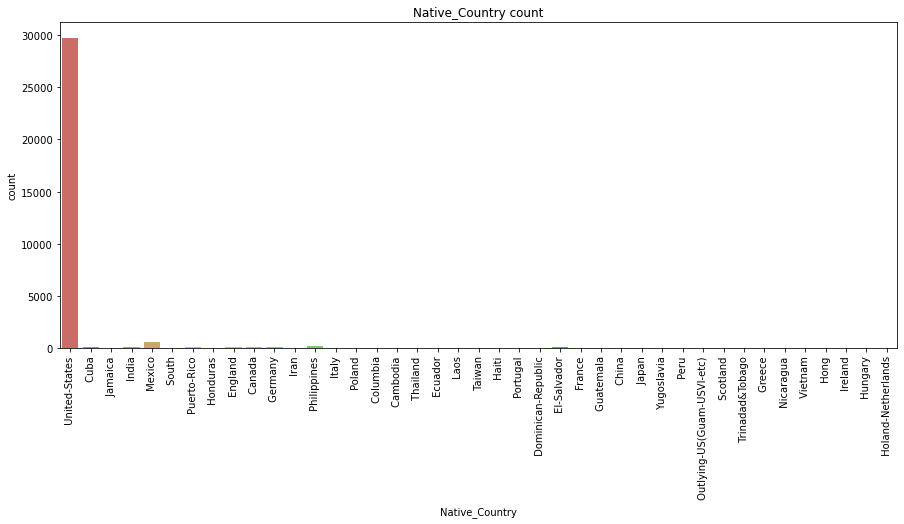

In [270]:
plt.figure(figsize=(15,6))
sns.countplot(salary_pre_data['Native_Country'],data=salary_pre_data,palette='hls')
plt.xticks(rotation = 90)
plt.title('Native_Country count')
plt.show()

In [271]:
#Due to the high values we decide to drop other country if we not drop the column model will not get much accuracy
#salary_pre_data=salary_pre_data[salary_pre_data['Native_Country'] == 'United-States']
salary_pre_data.drop(columns='Native_Country',inplace=True)

In [272]:
salary_pre_data.head()

,Age,Employee_Type,Education,Marital_Status,Occupation,Gender,Hours_Per_Week,Salary
0,39,State-gov,Bachelors,other,Adm-clerical,Male,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Married,Exec-managerial,Male,13,<=50K
2,38,Private,HS-grad,other,Handlers-cleaners,Male,40,<=50K
3,53,Private,School Education,Married,Handlers-cleaners,Male,40,<=50K
4,28,Private,Bachelors,Married,Prof-specialty,Female,40,<=50K


In [274]:
salary_pre_data['Salary'].value_counts()

 <=50K    24698
 >50K      7839
Name: Salary, dtype: int64

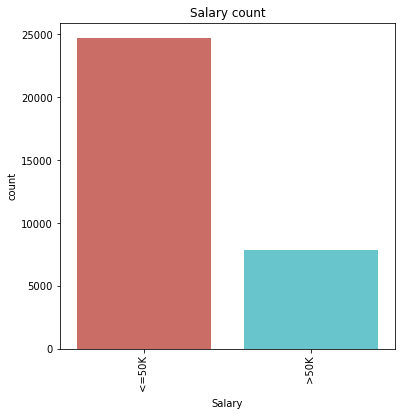

In [275]:
plt.figure(figsize=(6,6))
sns.countplot(salary_pre_data['Salary'],data=salary_pre_data,palette='hls')
plt.xticks(rotation = 90)
plt.title('Salary count')
plt.show()

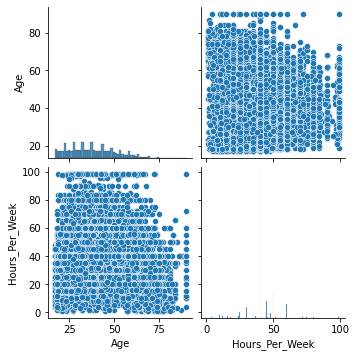

In [279]:
sns.pairplot(salary_pre_data)
plt.show()

In [280]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
salary_pre_data['Education']=label.fit_transform(salary_pre_data['Education'])
salary_pre_data['Marital_Status']=label.fit_transform(salary_pre_data['Marital_Status'])
salary_pre_data['Occupation']=label.fit_transform(salary_pre_data['Occupation'])
salary_pre_data['Gender']=label.fit_transform(salary_pre_data['Gender'])
salary_pre_data['Salary']=label.fit_transform(salary_pre_data['Salary'])
salary_pre_data['Employee_Type']=label.fit_transform(salary_pre_data['Employee_Type'])
salary_pre_data.head()

,Age,Employee_Type,Education,Marital_Status,Occupation,Gender,Hours_Per_Week,Salary
0,39,6,0,1,0,1,40,0
1,50,5,0,0,3,1,13,0
2,38,3,2,1,5,1,40,0
3,53,3,6,0,5,1,40,0
4,28,3,0,0,9,0,40,0


No handles with labels found to put in legend.


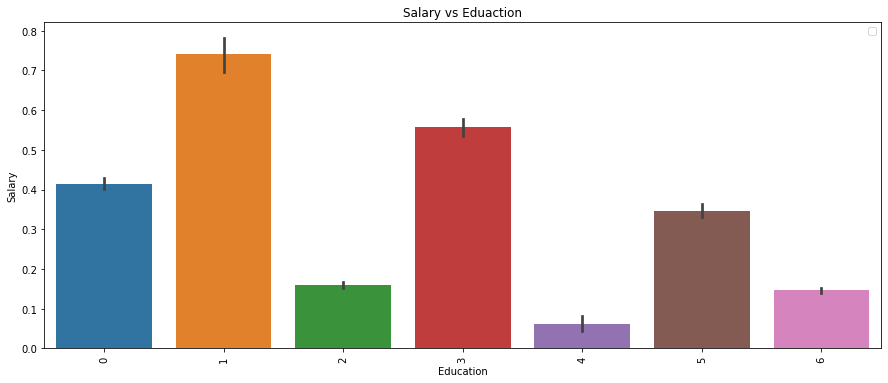

In [290]:
#How Salary depent on eduaction
plt.figure(figsize=(15,6))
sns.barplot(x='Education',y='Salary',data=salary_pre_data)
plt.title('Salary vs Eduaction')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

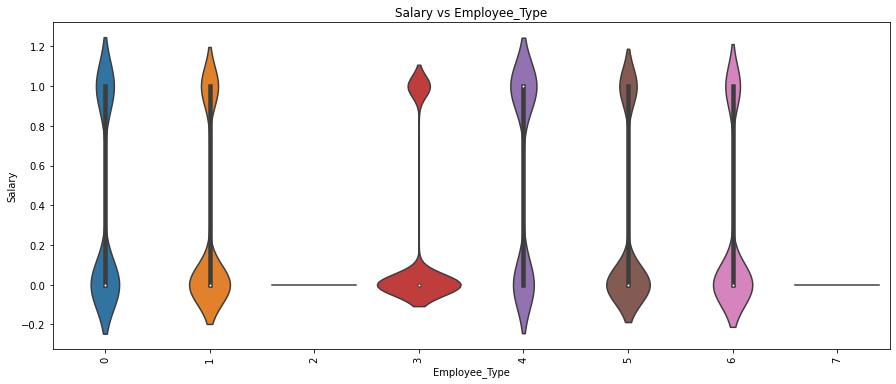

In [291]:
plt.figure(figsize=(15,6))
sns.violinplot(x='Employee_Type',y='Salary',data=salary_pre_data)
plt.title('Salary vs Employee_Type')
plt.xticks(rotation = 90)
plt.show()

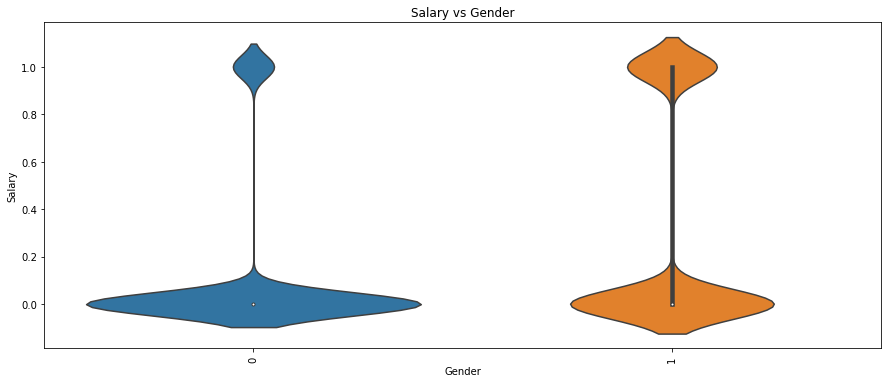

In [292]:
plt.figure(figsize=(15,6))
sns.violinplot(x='Gender',y='Salary',data=salary_pre_data)
plt.title('Salary vs Gender')
plt.xticks(rotation = 90)
plt.show()

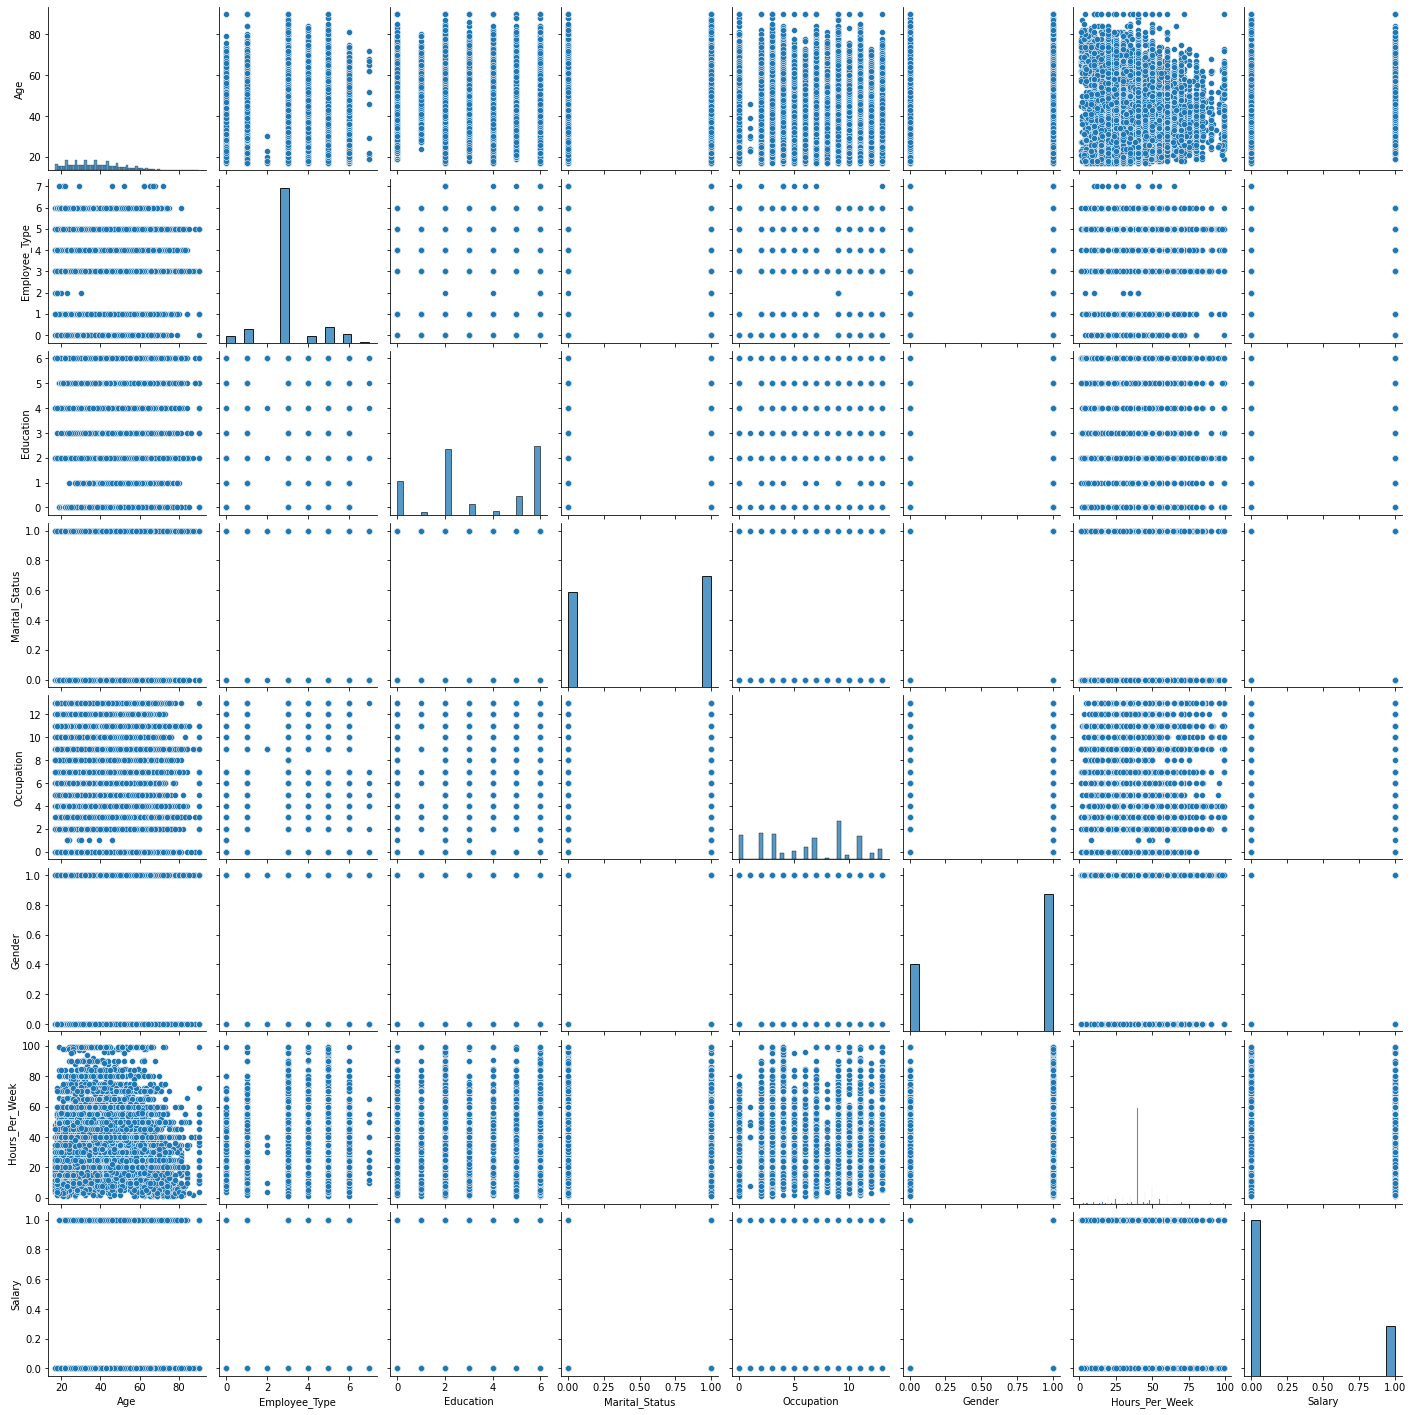

In [293]:
sns.pairplot(salary_pre_data,palette='hls')
plt.show()

<AxesSubplot:>

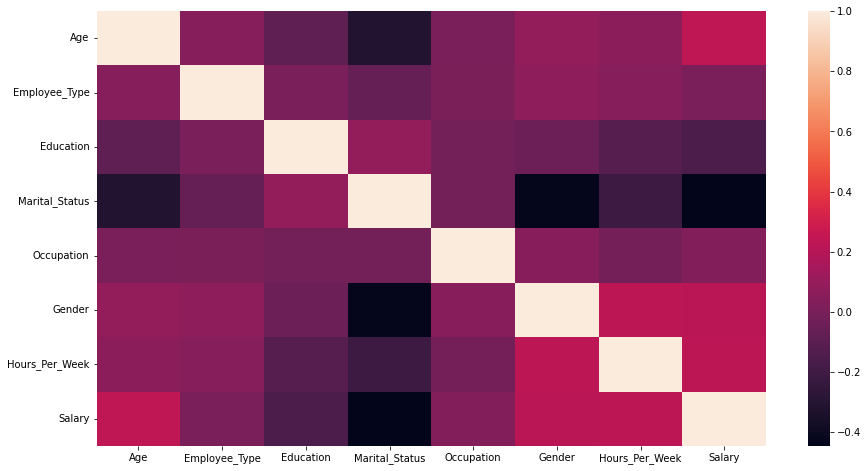

In [294]:
plt.figure(figsize=(15,8))
sns.heatmap(salary_pre_data.corr())

In [295]:
x = salary_pre_data.iloc[:,:-1].values #independent variable

y = salary_pre_data.iloc[:,-1:].values #dependent variable

In [296]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaled_data = scaler.transform(x)

In [297]:
x = pd.DataFrame(scaled_data,columns=['Age', 'Employee_Type', 'Education', 'Marital_Status', 'Occupation', 'Gender', 'Hours_Per_Week'])
x

,Age,Employee_Type,Education,Marital_Status,Occupation,Gender,Hours_Per_Week
0,0.030390,2.623449,-1.488249,0.924443,-1.545209,0.703020,-0.035664
1,0.836973,1.720541,-1.488249,-1.081733,-0.790133,0.703020,-2.222483
2,-0.042936,-0.085276,-0.604470,0.924443,-0.286749,0.703020,-0.035664
3,1.056950,-0.085276,1.163089,-1.081733,-0.286749,0.703020,-0.035664
4,-0.776193,-0.085276,-1.488249,-1.081733,0.720018,-1.422436,-0.035664
...,...,...,...,...,...,...,...
32532,-0.849519,-0.085276,0.721200,-1.081733,1.475094,-1.422436,-0.197650
32533,0.103716,-0.085276,-0.604470,-1.081733,-0.035058,0.703020,-0.035664
32534,1.423579,-0.085276,-0.604470,0.924443,-1.545209,-1.422436,-0.035664
32535,-1.216148,-0.085276,-0.604470,0.924443,-1.545209,0.703020,-1.655530


In [298]:
#split data into training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=1)

# Logistic Regression

In [299]:
#Here we use logistic Regression Algorithm to trian model
from sklearn.linear_model import LogisticRegression
logi_regg = LogisticRegression()
logi_regg.fit(x_train,y_train)

LogisticRegression()

In [300]:
#predict the test data
y_pred_logi = logi_regg.predict(x_test)

In [301]:
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_logi = accuracy_score(y_test,y_pred_logi)
print('Accuracy of model is : ',score_logi)

error_logi = confusion_matrix(y_test,y_pred_logi)
print("Correct and Incorrect input data :'\n'", error_logi)

Accuracy of model is :  0.7829043411448329
Correct and Incorrect input data :'
' [[17820  1982]
 [ 3669  2559]]


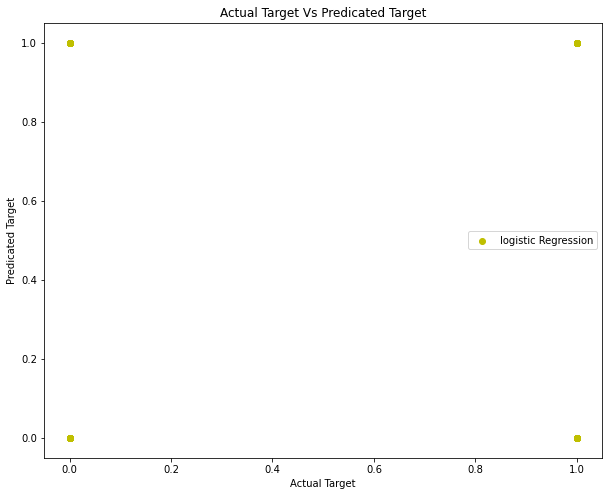

In [302]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_logi,c='y',label='logistic Regression')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()

# K-Nearest Neighbours

In [303]:
from sklearn.neighbors import KNeighborsClassifier
list1 = []
list2 = []
for i in range(3,50,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    from sklearn.metrics import accuracy_score
    y_pred = knn.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    list1.append(score)
    list2.append(i)
print(list1)
print(list2)
#print(i)

[0.788897426046869, 0.7996926623127161, 0.8025739531310027, 0.8047637341529005, 0.8065693430656934, 0.8071840184402612, 0.8071840184402612, 0.808029197080292, 0.8067998463311563, 0.8072608528620823, 0.806607760276604, 0.8061083365347675, 0.806607760276604, 0.8054168267383788, 0.8049558202074529, 0.8034575489819439, 0.8042258932001537, 0.8045332308874376, 0.8049558202074529, 0.8034191317710334, 0.8043027276219746, 0.8042643104110642, 0.8044179792547062, 0.8037648866692279]
[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


In [304]:
df = pd.DataFrame(list1,columns=['score'])
df['k_values'] = list2
df

,score,k_values
0,0.788897,3
1,0.799693,5
2,0.802574,7
3,0.804764,9
4,0.806569,11
5,0.807184,13
6,0.807184,15
7,0.808029,17
8,0.806800,19
9,0.807261,21


<AxesSubplot:xlabel='k_values', ylabel='score'>

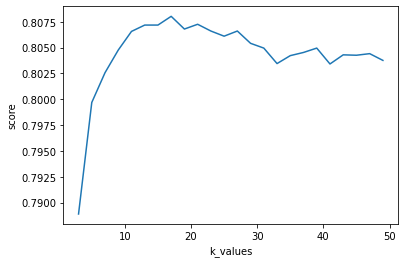

In [305]:
#here we plot the line graph
sns.lineplot(df.k_values,df.score)
#df.plot(x = 'k_values',y='score',kind='line')

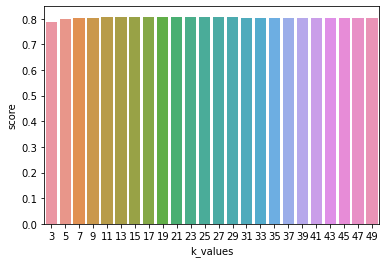

In [306]:
#df.plot(x = 'mse',y='k_values',kind='bar')
sns.barplot(df.k_values,df.score)
plt.show()

In [307]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train,y_train)
knn

KNeighborsClassifier(n_neighbors=17)

In [308]:
y_pred_knn = knn.predict(x_test)

In [309]:
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_knn = accuracy_score(y_test,y_pred_knn)
print('Accuracy of model is : ',score_knn)

error_knn = confusion_matrix(y_test,y_pred_knn)
print("Correct and Incorrect input data :'\n'", error_knn)

Accuracy of model is :  0.808029197080292
Correct and Incorrect input data :'
' [[17580  2222]
 [ 2775  3453]]


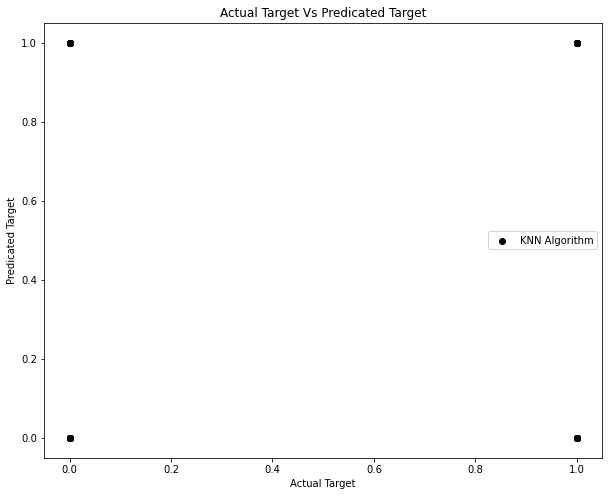

In [310]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_knn,c='k',label='KNN Algorithm')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()

# Support Vector Machine Algorithm

In [311]:
from sklearn import svm
#from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
kernel_name = ['linear', 'poly', 'rbf','sigmoid'] #{'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
score_store = []
for i in kernel_name:
    cv_classification = svm.SVC(kernel=i)#SVC = support vector classifier
    cv_classification.fit(x_train,y_train)
    y_pred = cv_classification.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    score_store.append(score)
score_store

[0.7872839031886285, 0.8026123703419131, 0.806377257011141, 0.7194006915097964]

In [312]:
df1 = pd.DataFrame(score_store,columns=['score'])
df1['kernal'] = kernel_name
df1

,score,kernal
0,0.787284,linear
1,0.802612,poly
2,0.806377,rbf
3,0.719401,sigmoid


<AxesSubplot:xlabel='kernal', ylabel='score'>

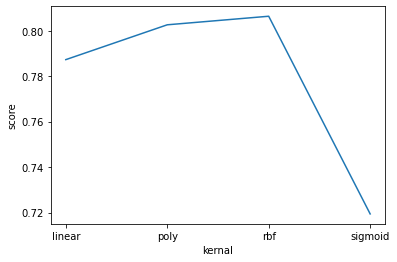

In [313]:
#here we plot the line graph
sns.lineplot(df1.kernal,df1.score)
#df1.plot(x = 'kernal',y='score',kind='line')

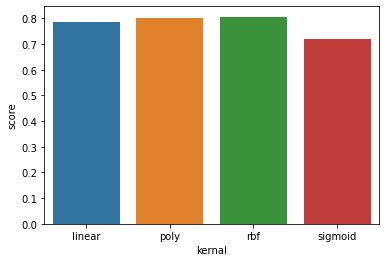

In [319]:
#df1.plot(x = 'score',y='k_values',kind='bar')
sns.barplot(df1.kernal,df1.score)
plt.show()

In [320]:
#Used support vector machine
cv_classification = svm.SVC(kernel='rbf')    #SVC = support vector classifier
cv_classification.fit(x_train,y_train)

SVC()

In [321]:
y_pred_svm = cv_classification.predict(x_test)

In [322]:
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_svm = accuracy_score(y_test,y_pred_svm)
print('Accuracy of model is : ',score_svm)

error_svm = confusion_matrix(y_test,y_pred_svm)
print("Correct and Incorrect input data :'\n'", error_svm)

Accuracy of model is :  0.806377257011141
Correct and Incorrect input data :'
' [[17959  1843]
 [ 3197  3031]]


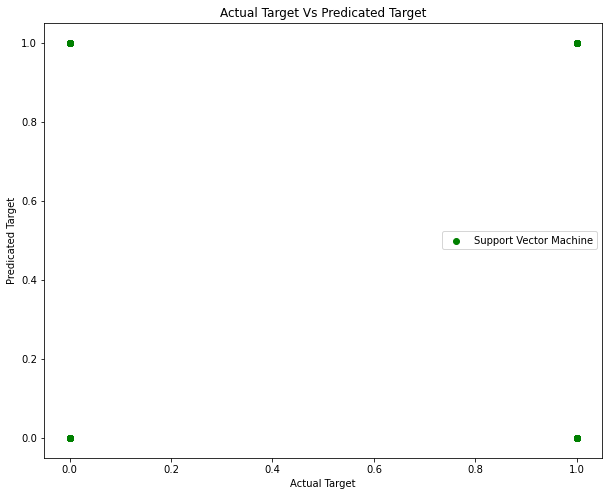

In [323]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_svm,c='g',label='Support Vector Machine')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()

# Decision Tree Classification Algorithm

In [324]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy') # entropy = information gain
dt_classifier.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy')

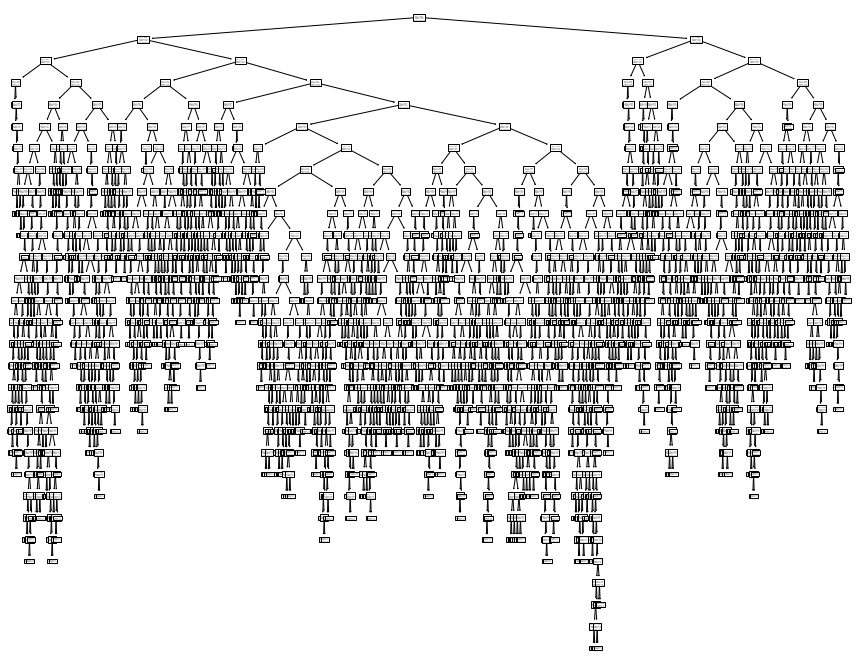

In [325]:
from sklearn import tree
fig = plt.figure(figsize=(15,12))
x=tree.plot_tree(dt_classifier)

In [326]:
y_pred_dt = dt_classifier.predict(x_test)

In [327]:
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_dt = accuracy_score(y_test,y_pred_dt)
print('Accuracy of model is : ',score_dt)

error_dt = confusion_matrix(y_test,y_pred_dt)
print("Correct and Incorrect input data :'\n'", error_dt)

Accuracy of model is :  0.7709950057625816
Correct and Incorrect input data :'
' [[16738  3064]
 [ 2897  3331]]


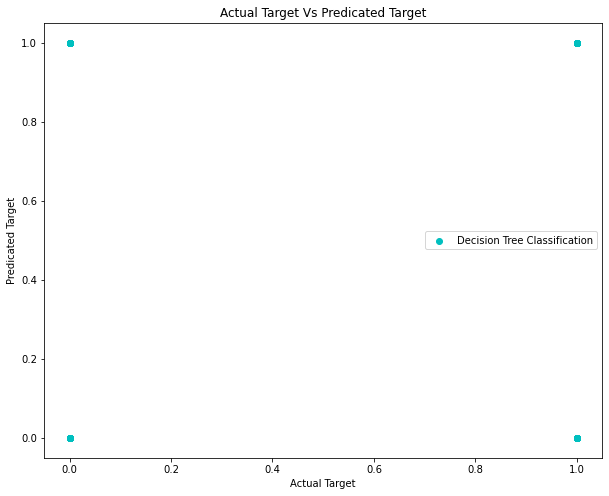

In [328]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_dt,c='c',label='Decision Tree Classification')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()

# Navie Bayer Classification Algorithm

In [329]:
from sklearn.naive_bayes import GaussianNB
NBCA = GaussianNB()
NBCA.fit(x_train,y_train)

GaussianNB()

In [330]:
y_pred_nb = NBCA.predict(x_test)

In [331]:
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_nb = accuracy_score(y_test,y_pred_nb)
print('Accuracy of model is : ',score_nb)

error_nb = confusion_matrix(y_test,y_pred_nb)
print("Correct and Incorrect input data :'\n'", error_nb)

Accuracy of model is :  0.7595850941221667
Correct and Incorrect input data :'
' [[15343  4459]
 [ 1799  4429]]


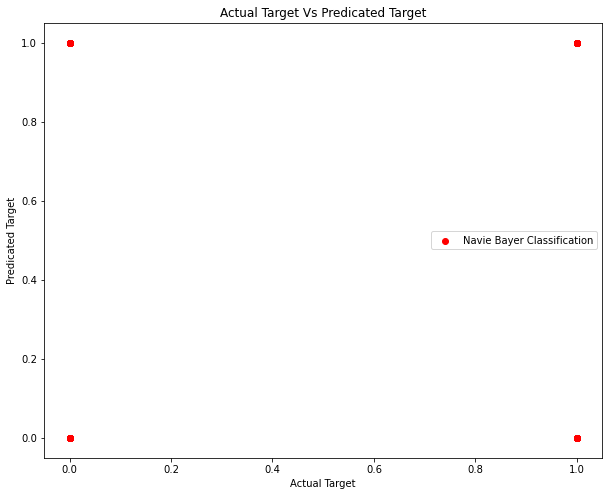

In [332]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_nb,c='r',label='Navie Bayer Classification')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()

# Random Forest Classification Algorithm

In [333]:
from sklearn.ensemble import RandomForestClassifier
RFAClass = RandomForestClassifier(n_estimators=50) #n_estimators less error maximum and more error less
RFAClass.fit(x_train,y_train)
RFAClass.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [334]:
y_pred_rf = RFAClass.predict(x_test)

In [335]:
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy of model is : ',score_rf)

error_rf = confusion_matrix(y_test,y_pred_rf)
print("Correct and Incorrect input data :'\n'", error_rf)

Accuracy of model is :  0.8066845946984249
Correct and Incorrect input data :'
' [[17554  2248]
 [ 2784  3444]]


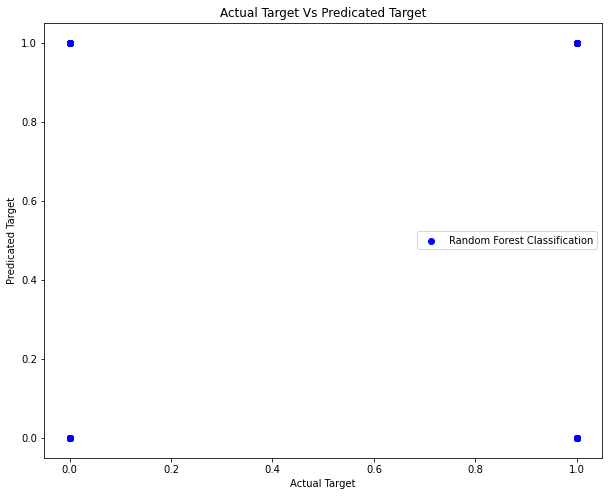

In [336]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_rf,c='b',label='Random Forest Classification')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()

# XGBOOST Classifier

In [338]:
from xgboost import XGBClassifier
xgb = XGBClassifier() #n_estimators less error maximum and more error less
xgb.fit(x_train,y_train)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [339]:
y_pred_xgb = xgb.predict(x_test)

In [340]:
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_xgb= accuracy_score(y_test,y_pred_xgb)
print('Accuracy of model is : ',score_xgb)

error_xgb= confusion_matrix(y_test,y_pred_xgb)
print("Correct and Incorrect input data :'\n'", error_xgb)

Accuracy of model is :  0.8230503265462927
Correct and Incorrect input data :'
' [[17718  2084]
 [ 2522  3706]]


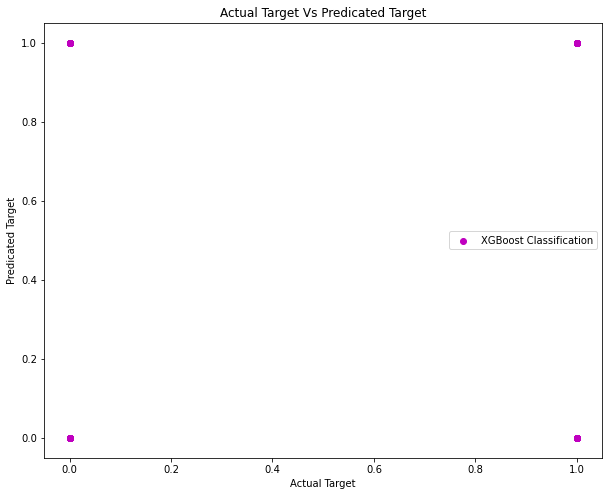

In [341]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_xgb,c='m',label='XGBoost Classification')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()

# All Classification Type algorithm result


In [342]:
#Here we check the accuracy of model with the help of accuracy score and confusion metrix

print('Logistic Regression')
print('Accuracy of model is : ',score_logi)
print("Correct and Incorrect input data :'\n'", error_logi)


print('\n KNN Classification')
print('Accuracy of model is : ',score_knn)
print("Correct and Incorrect input data :'\n'", error_knn)

print('\n Support Vector Machine classification Algorithm')
print('Accuracy of model is : ',score_svm)
print("Correct and Incorrect input data :'\n'", error_svm)

print('\n Decision Tree Classifcation Algorithm')
print('Accuracy of model is : ',score_dt)
print("Correct and Incorrect input data :'\n'", error_dt)
      
      

print('\n Navie Bayes Classification Algorithms')
print('Accuracy of model is : ',score_nb)
print("Correct and Incorrect input data :'\n'", error_nb)
      
      
print('\n Random Forest classification Algorithm')
print('Accuracy of model is : ',score_rf)
print("Correct and Incorrect input data :'\n'", error_rf)


print('\n XGBoost Classification')
print('Accuracy of model is : ',score_xgb)
print("Correct and Incorrect input data :'\n'", error_xgb)

Logistic Regression
Accuracy of model is :  0.7829043411448329
Correct and Incorrect input data :'
' [[17820  1982]
 [ 3669  2559]]

 KNN Classification
Accuracy of model is :  0.808029197080292
Correct and Incorrect input data :'
' [[17580  2222]
 [ 2775  3453]]

 Support Vector Machine classification Algorithm
Accuracy of model is :  0.806377257011141
Correct and Incorrect input data :'
' [[17959  1843]
 [ 3197  3031]]

 Decision Tree Classifcation Algorithm
Accuracy of model is :  0.7709950057625816
Correct and Incorrect input data :'
' [[16738  3064]
 [ 2897  3331]]

 Navie Bayes Classification Algorithms
Accuracy of model is :  0.7595850941221667
Correct and Incorrect input data :'
' [[15343  4459]
 [ 1799  4429]]

 Random Forest classification Algorithm
Accuracy of model is :  0.8066845946984249
Correct and Incorrect input data :'
' [[17554  2248]
 [ 2784  3444]]

 XGBoost Classification
Accuracy of model is :  0.8230503265462927
Correct and Incorrect input data :'
' [[17718  208

In [343]:
Algorithm = ['Logistic Regression','K-NN','Support VM','Decision Tree','Navie Bayer','Random Forest','XGBoost Classifier']
score = [score_logi,score_knn,score_svm,score_dt,score_nb,score_rf,score_xgb]
df_plot = pd.DataFrame(Algorithm,columns=['Algorithm_Name'])
df_plot['Accuracy_Score']=score
df_plot

,Algorithm_Name,Accuracy_Score
0,Logistic Regression,0.782904
1,K-NN,0.808029
2,Support VM,0.806377
3,Decision Tree,0.770995
4,Navie Bayer,0.759585
5,Random Forest,0.806685
6,XGBoost Classifier,0.823050


No handles with labels found to put in legend.


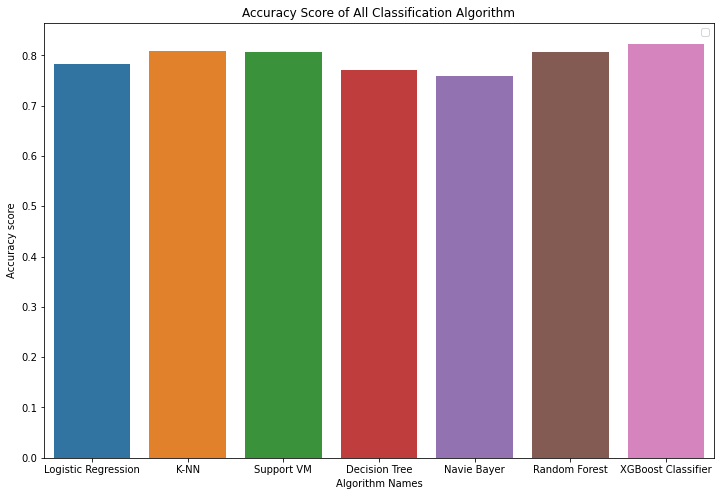

In [344]:
plt.figure(figsize=(12,8))
sns.barplot(df_plot.Algorithm_Name,df_plot.Accuracy_Score)
plt.xlabel('Algorithm Names')
plt.ylabel('Accuracy score')
plt.title('Accuracy Score of All Classification Algorithm')
plt.legend()
plt.show()

# conclusion : 
    - see above plot XGBoost Classifier gives more accuracy to our model 
    - for salary prediction XGBoost Classifier Algorithm is Efficient.
    - XGBoost Classifier Accuracy is 82.30%

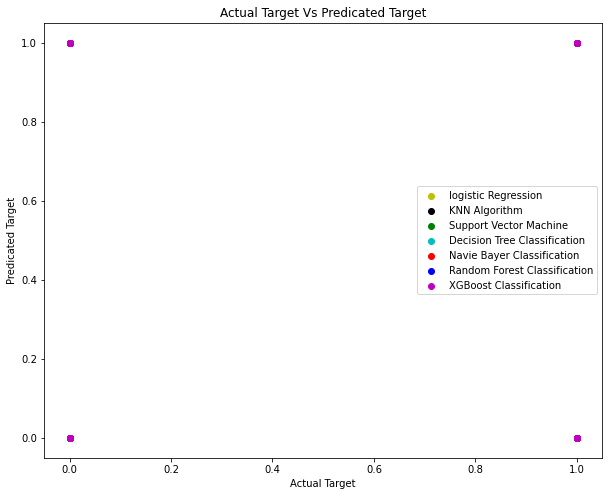

In [345]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_logi,c='y',label='logistic Regression')
plt.scatter(y_test,y_pred_knn,c='k',label='KNN Algorithm')
plt.scatter(y_test,y_pred_svm,c='g',label='Support Vector Machine')
plt.scatter(y_test,y_pred_dt,c='c',label='Decision Tree Classification')
plt.scatter(y_test,y_pred_nb,c='r',label='Navie Bayer Classification')
plt.scatter(y_test,y_pred_rf,c='b',label='Random Forest Classification')
plt.scatter(y_test,y_pred_xgb,c='m',label='XGBoost Classification')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()